# Seasonal variation of the simulated ionospheric potential
The source code of Figures 2.1 and 5.1

### Importing libraries

In [1]:
import matplotlib.pyplot as plt

import datetime as dt

import numpy as np

### Helper functions, variables and classes

In [2]:
def std_error(avg_val, avg_sqr, counter):
    """
    Estimate the standard error from the average value
    and the average value of the square.
    
    :param avg_val: the average value
    :param avg_sqr: the average square value
    :param counter: the size of the sample
    
    :return: the standard error
    """

    return np.sqrt((avg_sqr - avg_val**2) / (counter - 1))

In [3]:
month_name = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]

### Loading precalculated arrays

In [4]:
# the number of simulated days used for analysis
wrf_N_days = 4992
inm_N_days = 3650

In [5]:
# dates corresponding to the indices (0 axis) of the data arrays
# note: in the case of the WRF the dates correspond to real dates
# note: in the case of the INMCM the are 10 365-day years
wrf_dt_indices = np.array(
    [dt.date(1980, 1, 1) + dt.timedelta(i * 3) for i in range(wrf_N_days)]
)
inm_dt_indices = np.array(
    [dt.date(2022, 1, 1) + dt.timedelta(i % 365) for i in range(inm_N_days)]
)

In [6]:
# dictionaries where the processed data are saved
# dictionary keys represent CAPE threshold values in J/kg
# 500 J/kg corresponds to WRF simulations with a temperature threshold of 25 °C
# 800, 1000, 1200 J/kg correspond to usual WRF and INMCM simulations

# a dictionary containing arrays with the dimensions (4992, 24)
# axis 0 indicates the index of the day (see `wrf_dt_indices`)
wrf_hourly_total_ip = {
    key: np.load(f"./data/WRF/WRF_HOURLY_TOTAL_IP_{parameters}.npy")[:wrf_N_days]
    for key, parameters in zip([500, 800, 1000, 1200],
                               ["500_T2_25", "800", "1000", "1200"])
}

# a dictionary containing arrays with the dimensions (3650, 24)
# axis 0 indicates the index of the day (see `inm_dt_indices`)
inm_hourly_total_ip = {
    key: np.load(f"./data/INMCM/INMCM_HOURLY_TOTAL_IP_{parameters}.npy")[:inm_N_days]
    for key, parameters in zip([800, 1000, 1200],
                               ["800", "1000", "1200"])
}

### Figure 2.1
Seasonal variation of the IP

In [7]:
# calculating seasonal variation parameters for different parameterisations
# 7 sets for different subplots, each set contains 12 monthly values

# monthly mean values of the IP
data = np.zeros((7, 12))

# monthly counts of days
data_counter = np.zeros((7, 12), dtype=int)

# monthly mean values of the IP square
data_sqr = np.zeros((7, 12))

for j, cape_thres in enumerate([800, 1000, 1200]):
    for m in range(12):

        # the index `ax_idx` (0 to 6) corresponds to the subplot:
        # 0: WRF, 1980–2020, CAPE=800,
        # 1: INMCM, 10 years, CAPE=800,
        # 2: WRF, 1980–2020, CAPE=1000,
        # 3: INMCM, 10 years, CAPE=1000,
        # 4: WRF, 1980–2020, CAPE=1200,
        # 5: INMCM, 10 years, CAPE=1200,
        # 6: Vostok station, 2006–2020 (fair-weather PG values)

        # axes indices for WRF-based subplots (0, 2, 4)
        ax_idx = j * 2

        # selecting the days belonging to the specific month
        wrf_inds = [i for i, date in enumerate(wrf_dt_indices)
                    if date.month == m + 1]

        # selecting IP values for specific CAPE value and month
        ip = wrf_hourly_total_ip[cape_thres][wrf_inds]

        # calculating seasonal variation parameters
        data[ax_idx, m] = ip.mean()
        data_counter[ax_idx, m] = len(ip)
        data_sqr[ax_idx, m] = np.sum(ip.mean(axis=-1) ** 2) / len(ip)

        # axes indices for INMCM-based subplots (1, 3, 5)
        ax_idx = j * 2 + 1

        # selecting the days belonging to the specific month
        inmcm_inds =[i for i, date in enumerate(inm_dt_indices)
                     if date.month == m + 1]

        # selecting IP values for specific CAPE value and month
        ip = inm_hourly_total_ip[cape_thres][inmcm_inds]

        # calculating seasonal variation parameters
        data[ax_idx, m] = ip.mean()
        data_counter[ax_idx, m] = len(ip)
        data_sqr[ax_idx, m] = np.sum(ip.mean(axis=-1) ** 2) / len(ip)

# the last set is loaded from the processed PG data
# from the Vostok station generated in script #2
# the data are loaded as a dictionary with the keys `mean`, `counter`, `sqr`
# index 0: 2006–2020, index 1: 2006–2012, index 2: 2013–2020
vostok_results = np.load("./data/Vostok/vostok_2006_2020_results.npz")

data[-1] = vostok_results["mean"][0]
data_counter[-1] = vostok_results["counter"][0]
data_sqr[-1] = vostok_results["sqr"][0]

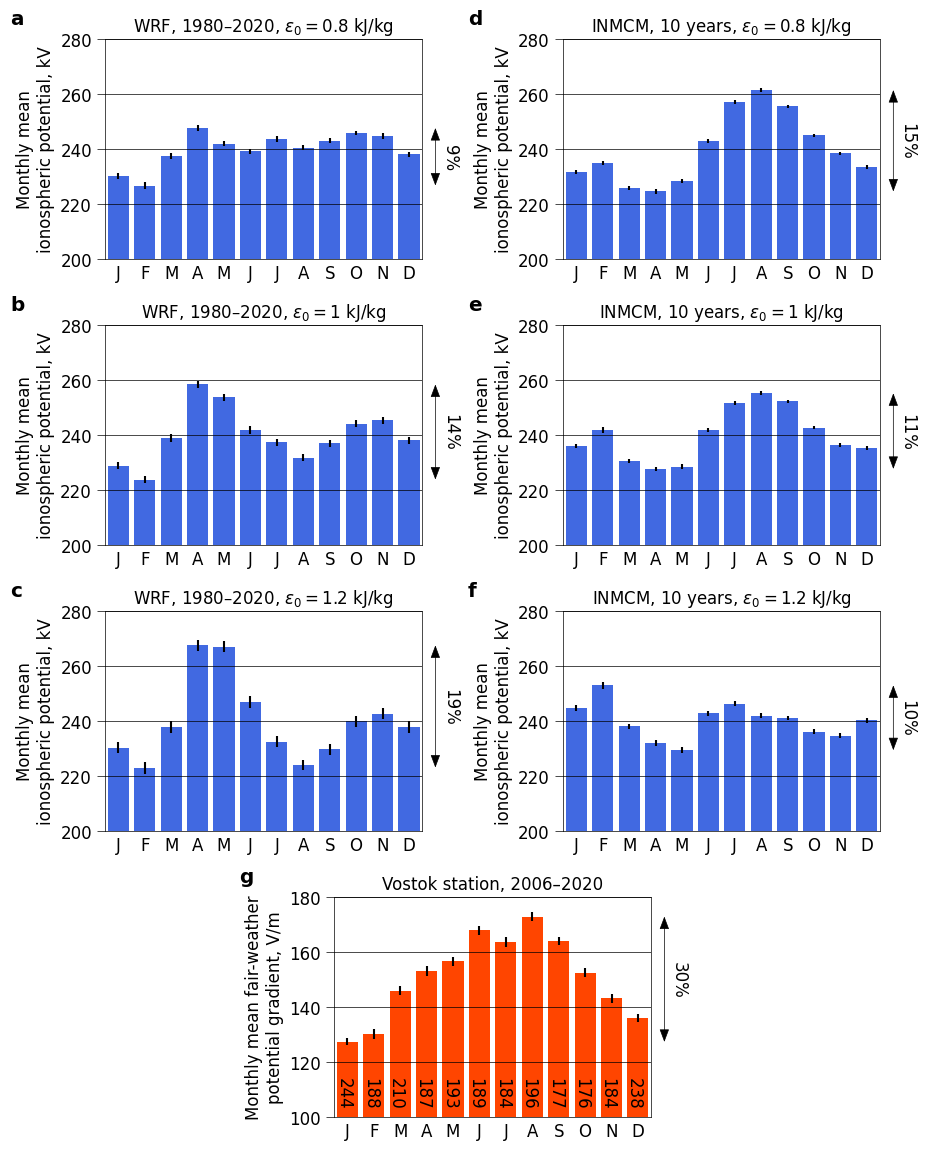

In [8]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)
ax = [None for _ in range(7)]
for n in range(6):
    ax[n] = fig.add_subplot(4, 4, (2*n + 1, 2*n + 2))
ax[6] = fig.add_subplot(4, 4, (14, 15))

low = [200e3] * 6 + [100]
high = [280e3] * 6 + [180]
step = [20e3] * 6 + [20]
coeff = [1e3] * 6 + [1]
caption = ["WRF, 1980–2020, $\\varepsilon_0 = 0.8$ kJ/kg",
           "INMCM, 10 years, $\\varepsilon_0 = 0.8$ kJ/kg",
           "WRF, 1980–2020, $\\varepsilon_0 = 1$ kJ/kg",
           "INMCM, 10 years, $\\varepsilon_0 = 1$ kJ/kg",
           "WRF, 1980–2020, $\\varepsilon_0 = 1.2$ kJ/kg",
           "INMCM, 10 years, $\\varepsilon_0 = 1.2$ kJ/kg",
           "Vostok station, 2006–2020"]

col = ["royalblue"] * 6 + ["orangered"]

for n in range(7):
    for axis in ["top", "bottom", "left", "right"]:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5, axis="y")
    ax[n].tick_params(length=0, width=0.5, axis="x")
    ax[n].grid(color="0.", linewidth=0.5, axis="y")

    ax[n].set_xlim((-0.5, 11.5))
    ax[n].set_xticks(np.arange(12))
    ax[n].set_xticklabels(month_name, fontsize="large", va="top")

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    ax[n].set_yticklabels((np.arange(low[n], high[n] + step[n] / 2,
                                     step[n]) / coeff[n]).astype(int),
                          fontsize="large")
    if n < 6:
        ax[n].set_ylabel("Monthly mean\nionospheric potential, kV",
                         fontsize="large")
    else:
        ax[n].set_ylabel("Monthly mean fair-weather\npotential gradient, V/m",
                         fontsize="large")

    ax[n].set_title(caption[n], fontsize="large")

    ax[n].annotate("", xy=(12, np.min(data[n])), xycoords="data",
                   xytext=(12, np.max(data[n])), textcoords="data",
                   annotation_clip=False,
                   arrowprops=dict(
                       arrowstyle="<|-|>,head_length=0.8,head_width=0.3",
                       patchA=None, patchB=None, shrinkA=0., shrinkB=0.,
                       connectionstyle="arc3,rad=0.", fc="black",
                       linewidth=0.5
                   ))
    # ampl = (np.max(data[n]) - np.min(data[n])) / np.mean(data[n])
    ampl = (np.max(data[n]) - np.min(data[n])) / \
        np.sum(data[n] * data_counter[n]) * np.sum(data_counter[n])
    ax[n].text(12.2, (np.min(data[n]) + np.max(data[n])) / 2,
               f"{ampl * 100:.0f}%",
               fontsize="large", ha="left", va="center", rotation=270)

fig.align_ylabels([ax[0], ax[2], ax[4]])
fig.align_ylabels([ax[1], ax[3], ax[5]])

for n in range(7):
    ax[n].bar(np.arange(12), data[n],
              yerr=std_error(data[n],
                             data_sqr[n],
                             data_counter[n]),
              width=0.8, color=col[n])

for n in range(6):
    ax[n].text(-0.3, 1.05, chr(ord("a") + 3 * (n % 2) + n // 2),
               fontsize="x-large",
               fontweight="semibold", ha="left", va="bottom",
               transform=ax[n].transAxes)
ax[6].text(-0.3, 1.05, chr(ord("a") + 6), fontsize="x-large",
           fontweight="semibold", ha="left", va="bottom",
           transform=ax[6].transAxes)

fig.subplots_adjust(hspace=0.3, wspace=1.6)

for m in range(12):
    ax[6].annotate(f"{data_counter[6, m]}",
                   xy=(m-0.15, ax[6].get_ylim()[0] + 3),
                   rotation=270, ha="center", va="bottom",
                   fontsize="large", color="0.")

fig.savefig("figures/ip_pg_total.eps", bbox_inches="tight")

### Figure 2.5
Seasonal variation of the IP for smaller time periods

In [9]:
# calculate seasonal variation parameters for different temporal parts# calculating seasonal variation parameters for different parameterisations
# 8 sets for different subplots, each set contains 12 monthly values

# monthly mean values of the IP
data = np.zeros((7, 12))

# monthly counts of days
data_counter = np.zeros((7, 12), dtype=int)

# monthly mean values of the IP square
data_sqr = np.zeros((7, 12))

data = np.zeros((8, 12))
data_counter = np.zeros((8, 12), dtype=int)
data_sqr = np.zeros((8, 12))

# to construct this figure, we divide the datasets into equal ranges of years
# the dictionary keys below denote the subplot number in the figure
wrf_ranges = {
    0: range(1981, 1990 + 1),
    1: range(1991, 2000 + 1),
    2: range(2001, 2010 + 1),
    3: range(2011, 2020 + 1),
}

inm_ranges = {
    4: range(0, 5),
    5: range(5, 10)
}

for m in range(12):
    for ax_idx in range(6):
        if ax_idx in [0, 1, 2, 3]:

            # selecting the days belonging to the specific month
            wrf_inds = [i for i, date in enumerate(wrf_dt_indices)
                        if date.month == m + 1
                        and date.year in wrf_ranges[ax_idx]
                       ]

            # selecting IP values for CAPE = 1000 J/kg and selected month
            ip = wrf_hourly_total_ip[1000][wrf_inds]

            # calculating seasonal variation parameters
            data[ax_idx, m] = ip.mean()
            data_counter[ax_idx, m] = len(ip)
            data_sqr[ax_idx, m] = np.sum(ip.mean(axis=-1) ** 2) / len(ip)

        if ax_idx in [4, 5]:

            # selecting the days belonging to the specific month
            inmcm_inds = [i for i, date in enumerate(inm_dt_indices) 
                          if date.month == m + 1
                          and i//365 in inm_ranges[ax_idx]
                         ]

            # selecting IP values for CAPE = 1000 J/kg and selected month
            ip  = inm_hourly_total_ip[1000][inmcm_inds]

            # calculating seasonal variation parameters
            data[ax_idx, m] = ip.mean()
            data_counter[ax_idx, m] = len(ip)
            data_sqr[ax_idx, m] = np.sum(ip.mean(axis=-1) ** 2) / len(ip)

# the last two sets are loaded from the processed PG data
# from the Vostok station generated in script #2
# the data are loaded as a dictionary with the keys `mean`, `counter`, `sqr`
# index 0: 2006–2020, index 1: 2006–2012, index 2: 2013–2020
vostok_results = np.load("./data/Vostok/vostok_2006_2020_results.npz")

# 2006–2012
data[6] = vostok_results["mean"][1]
data_counter[6] = vostok_results["counter"][1]
data_sqr[6] = vostok_results["sqr"][1]

# 2013–2020
data[7] = vostok_results["mean"][2]
data_counter[7] = vostok_results["counter"][2]
data_sqr[7] = vostok_results["sqr"][2]

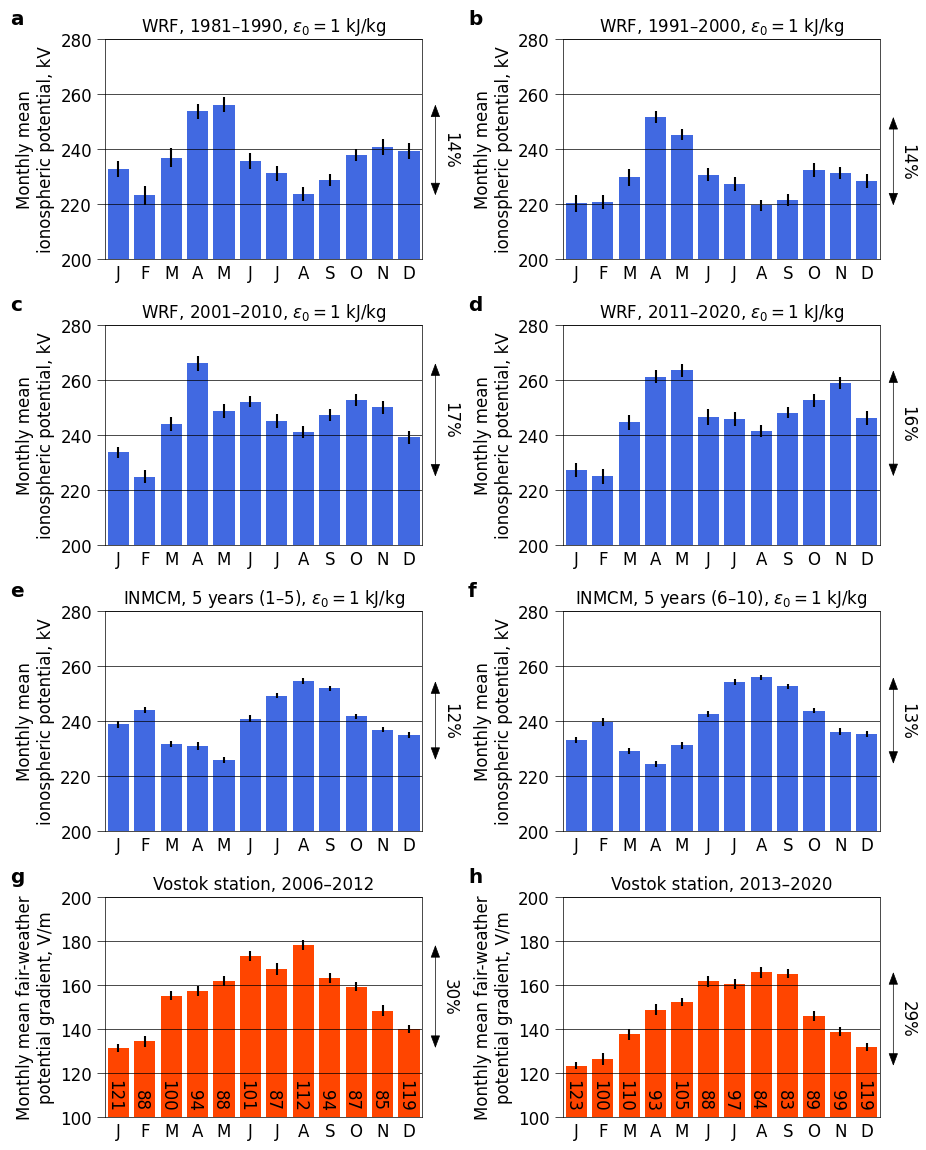

In [10]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)
ax = [None for _ in range(8)]

for n in range(8):
    ax[n] = fig.add_subplot(4, 4, (2*n + 1, 2*n + 2))

low = [200e3] * 6 + [100] * 2
high = [280e3] * 6 + [200] * 2
step = [20e3] * 6 + [20] * 2
coeff = [1e3] * 6 + [1] * 2

caption = ["WRF, 1981–1990, $\\varepsilon_0 = 1$ kJ/kg",
           "WRF, 1991–2000, $\\varepsilon_0 = 1$ kJ/kg",
           "WRF, 2001–2010, $\\varepsilon_0 = 1$ kJ/kg",
           "WRF, 2011–2020, $\\varepsilon_0 = 1$ kJ/kg",
           "INMCM, 5 years (1–5), $\\varepsilon_0 = 1$ kJ/kg",
           "INMCM, 5 years (6–10), $\\varepsilon_0 = 1$ kJ/kg",
           "Vostok station, 2006–2012",
           "Vostok station, 2013–2020"]

col = ["royalblue"] * 6 + ["orangered"] * 2

for n in range(8):
    for axis in ["top", "bottom", "left", "right"]:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5, axis="y")
    ax[n].tick_params(length=0, width=0.5, axis="x")
    ax[n].grid(color="0.", linewidth=0.5, axis="y")

    ax[n].set_xlim((-0.5, 11.5))
    ax[n].set_xticks(np.arange(12))
    ax[n].set_xticklabels(month_name, fontsize="large", va="top")

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    ax[n].set_yticklabels((np.arange(low[n], high[n] + step[n] / 2,
                                     step[n]) / coeff[n]).astype(int),
                          fontsize="large")
    if n <= 5:
        ax[n].set_ylabel("Monthly mean\nionospheric potential, kV",
                         fontsize="large")
    else:
        ax[n].set_ylabel("Monthly mean fair-weather\npotential gradient, V/m",
                         fontsize="large")

    ax[n].set_title(caption[n], fontsize="large")

    ax[n].annotate("", xy=(12, np.min(data[n])), xycoords="data",
                   xytext=(12, np.max(data[n])), textcoords="data",
                   annotation_clip=False,
                   arrowprops=dict(
                       arrowstyle="<|-|>,head_length=0.8,head_width=0.3",
                       patchA=None, patchB=None, shrinkA=0., shrinkB=0.,
                       connectionstyle="arc3,rad=0.", fc="black",
                       linewidth=0.5
                   ))
    # ampl = (np.max(data[n]) - np.min(data[n])) / np.mean(data[n])
    ampl = (np.max(data[n]) - np.min(data[n])) / \
        np.sum(data[n] * data_counter[n]) * np.sum(data_counter[n])
    ax[n].text(12.2, (np.min(data[n]) + np.max(data[n])) / 2,
               f"{ampl * 100:.0f}%",
               fontsize="large", ha="left", va="center", rotation=270)

fig.align_ylabels([ax[0], ax[2], ax[4], ax[6]])
fig.align_ylabels([ax[1], ax[3], ax[5], ax[7]])

for n in range(8):
    ax[n].bar(np.arange(12), data[n],
              yerr=std_error(data[n],
                             data_sqr[n],
                             data_counter[n]),
              width=0.8, color=col[n])

for n in range(8):
    ax[n].text(-0.3, 1.05, chr(ord("a") + n), fontsize="x-large",
               fontweight="semibold", ha="left", va="bottom",
               transform=ax[n].transAxes)

fig.subplots_adjust(hspace=0.3, wspace=1.6)

for n in range(6, 8):
    for m in range(12):
        ax[n].annotate(f"{data_counter[n, m]}",
                       xy=(m-0.15, ax[n].get_ylim()[0] + 3),
                       rotation=270, ha="center", va="bottom",
                       fontsize="large", color="0.")

fig.savefig("figures/ip_pg_partial.eps", bbox_inches="tight")